# Capstone Project - The Battle of Neighborhoods

### Introduction



**"What would you recommend in New York City to open a new afforable hotel?"**

New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2014, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States.

New York City is so much more than a bunch of amazing points of interest spread across 5 boroughs.What truly makes this city so special is its distinct neighborhoods which themselves make up the integral parts of New York.

### Data
For this project we need the following data :

- New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
  - Data source : https://cocl.us/new_york_dataset
  - Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city.
- Hotels in each neighborhood of new york city.
  - Data source : Fousquare API
  - Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only hotels.

#### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
#!conda install -c conda-forge geocoder --yes
import geocoder
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [271]:
radius=1000
LIMIT=100
CLIENT_ID = 'LXNSRTYLAO40EMNE1SMWQLF1JJATF30SPCIEGL0VTLJWCXH2' 
CLIENT_SECRET = 'AUQ54H4GOHU4PRL3ZATZNDLTBLSMLAR51V3GV304MXPWMQMK' 
VERSION = '20180605' 

### New York neighborhood general stats

In [6]:
url='https://cocl.us/new_york_dataset'

In [7]:
def get_data(url):
    resp=requests.get(url).json()
    features=resp['features']
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [8]:
new_york_data=get_data(url)
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


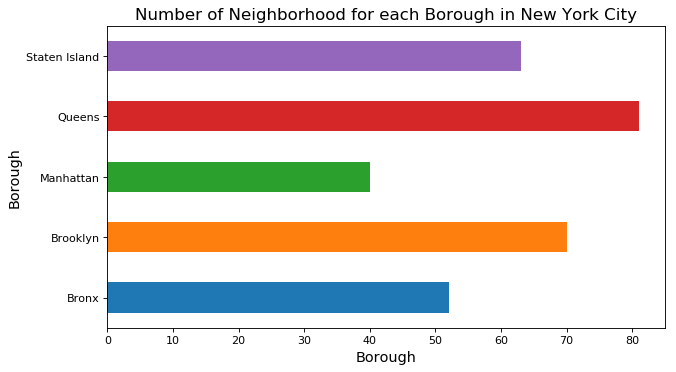

In [263]:
plt.figure(figsize=(9,5), dpi = 80)
plt.title('Number of Neighborhood for each Borough in New York City',fontsize = 15)
plt.xlabel('Borough', fontsize = 13)
plt.ylabel('Number of Neighborhood', fontsize=13)
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='barh')
plt.show()

### Get hotel venues in each neighborhood

In [272]:
def get_venues(lat,lng):
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

    results = requests.get(url).json()
    venues=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venues:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['shortName']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [273]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
hotel_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    print(row)
    venues = get_venues(Latitude,Longitude)
    hotels=venues[venues['Category']=='Hotel']   
    print('(',count,'/',len(new_york_data),')','Hotels in '+Neighborhood+', '+Borough+':'+str(len(hotels)))
    for hotel in hotels.values.tolist():
        id, name , category=hotel
        hotel_ny = hotel_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 1 / 306 ) Hotels in Wakefield, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 2 / 306 ) Hotels in Co-op City, Bronx:1
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 3 / 306 ) Hotels in Eastchester, Bronx:1
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 4 / 306 ) Hotels in Fieldston, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 5 / 306 ) Hotels in Riverdale, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 6 / 306 ) Hotels in Kingsbridge, Bronx:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 7 / 306 ) Hotels in Marble Hill, Manhattan:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 8 / 306 ) Hotels in Woodlawn, Bronx:0
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
( 9 / 306 ) Hotels in Norwood, Bronx:0
['Bronx', 'Williamsbridge', 40.88103887819211, -73.857446429

####  Manhattan has the largest number of hotels

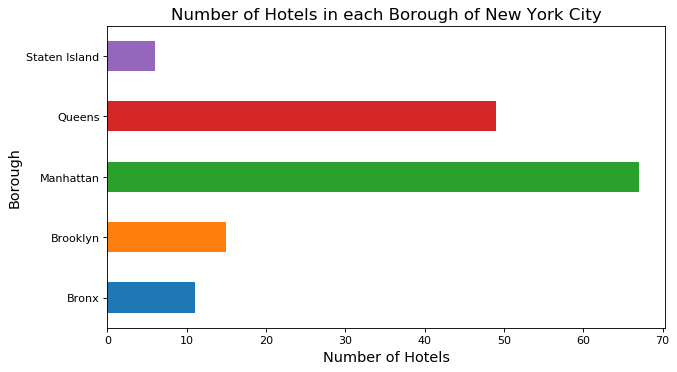

In [274]:
plt.figure(figsize=(9,5), dpi = 80)
plt.title('Number of Hotels in each Borough of New York City',fontsize = 15)
plt.ylabel('Borough', fontsize = 13)
plt.xlabel('Number of Hotels', fontsize=13)
hotel_ny.groupby('Borough')['ID'].count().plot(kind='barh')
plt.show()
plt.close()

####  Queensbridge on top has 11 hotels

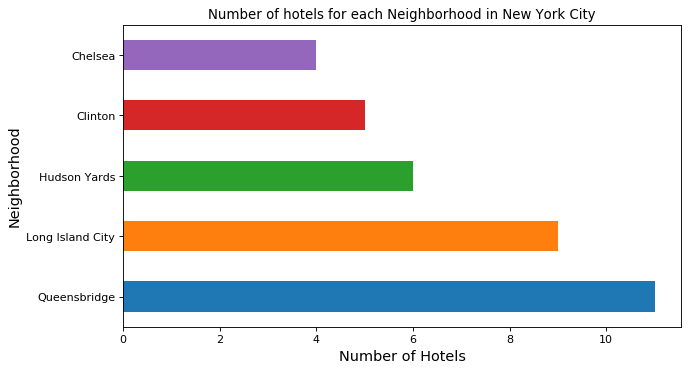

In [275]:
plt.figure(figsize=(9,5), dpi = 80)
plt.title('Number of hotels for each Neighborhood in New York City')
plt.ylabel('Neighborhood', fontsize = 13)
plt.xlabel('Number of Hotels', fontsize=13)
hotel_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='barh')
plt.show()
plt.close()

In [276]:
hotel_ny[hotel_ny['Neighborhood']=='Queensbridge'].shape

(11, 4)

### Get venue details of individual hotel

In [47]:
def get_venue_details(venue_id):

    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_type=venue_data['categories'][1]['name']
        venue_details.append([venue_id,venue_name,venue_type,venue_likes,venue_rating])
    except KeyError:
        pass
        
    column_names=['ID','Name','Type','Likes','Rating']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [94]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Type','Likes','Rating']
hotel_stats_ny=pd.DataFrame(columns=column_names)

for row in hotel_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,type,likes,rating=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,type,likes,rating=[0]*5
    hotel_stats_ny = hotel_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Type':type,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                               }, ignore_index=True)
    


                         ID          Name   Type  Likes  Rating
0  4ca57d6e14c33704d2d0b63b  Ramada Bronx  Motel      3     5.6
                         ID          Name   Type  Likes  Rating
0  4ca57d6e14c33704d2d0b63b  Ramada Bronx  Motel      3     5.6
No data available for id= 523122b311d2d7ba7a1a5f9c
No data available for id= 4bded394fe0e62b5b8fa0506
No data available for id= 4bded394fe0e62b5b8fa0506
No data available for id= 54932887498ee0902b1ed511
No data available for id= 54932887498ee0902b1ed511
No data available for id= 54932887498ee0902b1ed511
No data available for id= 4bded394fe0e62b5b8fa0506
Empty DataFrame
Columns: [ID, Name, Type, Likes, Rating]
Index: []
No data available for id= 4ba97dcbf964a5205e2a3ae3
No data available for id= 55fd42dd498e4df93558ce8e
No data available for id= 4bd1bb325e0cce7263e7a184
No data available for id= 54c11afe498e78ed162cf4a6
                         ID                     Name          Type  Likes  \
0  57ed4330498e34539123c310  1 Hotel Br

#### Drop hotels missing available data

In [95]:
hotel_stats=hotel_stats_ny[hotel_stats_ny.ID != 0].reset_index(drop=True)

In [96]:
hotel_stats

,Borough,Neighborhood,ID,Name,Type,Likes,Rating
0,Bronx,Co-op City,4ca57d6e14c33704d2d0b63b,Ramada Bronx,Motel,3,5.6
1,Bronx,Eastchester,4ca57d6e14c33704d2d0b63b,Ramada Bronx,Motel,3,5.6
2,Brooklyn,Brooklyn Heights,57ed4330498e34539123c310,1 Hotel Brooklyn Bridge,Wedding Hall,237,9.1
3,Manhattan,Chinatown,578692f4498e1054905dbde7,Hotel 50 Bowery NYC,Resort,71,9.0
4,Manhattan,Upper East Side,4b37853af964a520c54125e3,The Mark Hotel,Hotel Bar,88,8.7
5,Manhattan,Upper East Side,4ae0e432f964a5206e8321e3,The Surrey,Spa,66,8.2
6,Manhattan,Chelsea,40a16900f964a520f9f21ee3,Soho House,Lounge,1101,9.2
7,Manhattan,Tribeca,4ab6c985f964a5200a7920e3,Greenwich Hotel,Hotel Bar,92,8.8
8,Manhattan,Little Italy,578692f4498e1054905dbde7,Hotel 50 Bowery NYC,Resort,71,9.0
9,Manhattan,Financial District,57ab3eb5498e2efa275dfef3,AKA Wall Street,Resort,21,8.3


#### we can  see foursquare has more hotels data available in Manhattan , which also has the most variety of hotel types.

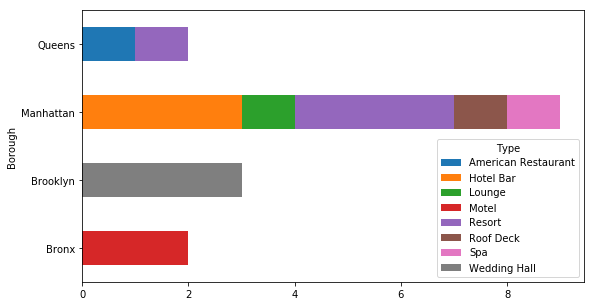

In [347]:
hotel_stats.groupby(['Borough','Type'])['ID'].count().unstack().plot(kind='barh',stacked=True,figsize=(9,5))
plt.show()

<a id="item2"></a>

## 2. Explore an affordable hotel in Manhattan
> https://www.kayak.com/New-York-Hotels.15830.hotel.ksp?gclid=CjwKCAjwue3nBRACEiwAkpZhmR_lQCbfWMLn47unjmDwp_ulQkb8xA96Sl_p8JF55zVpUnl3hrQtjRoCfPEQAvD_BwE

> - Downtown Manhattan is a calm and historic area south of 14th Street, where you can find Hilton Garden Inn New York, which provides amenities including a gym. Midtown is located between 34th Street and 59th Street, near the busy Times Square area, where you can find The Roosevelt Hotel, which has rooms with a terrace.
> - If you’re visiting Manhattan on a budget, there are some **affordable options** if you are willing to stay a bit further from Times Square. Consider the Upper West Side or Upper East Side, where you can go for a walk in Central Park or enjoy attractions like the Museum of Modern Art (MoMA). A convenient option in these areas could be the Empire Hotel, which has a rooftop pool. Another cheap option could be The Franklin Hotel, which provides a free breakfast.
> - Those attracted to outdoors and green spaces should head to **Greenwich Village**, just a 10-minute subway ride away from Central Park. There you will find several hotels with a pool, where you can relax after taking in the surroundings. Some examples are the Saratoga Hilton, the **Holiday Inn Saratoga Springs**, the Union Gables Bed & Breakfast and the Landmark Motor Inn.

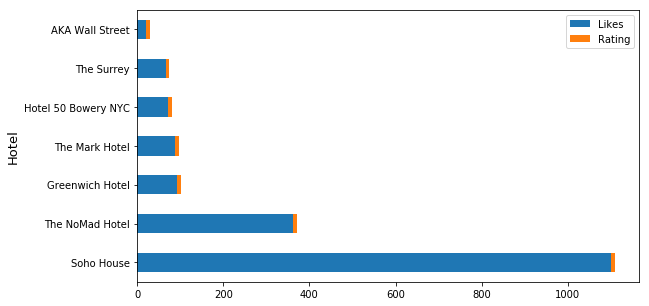

In [348]:
man_stats=hotel_stats[hotel_stats['Borough']=='Manhattan'].sort_values(by=['Likes', 'Rating'],ascending=False)
man_stats=man_stats[['Name','Likes','Rating']].drop_duplicates().set_index(['Name'])
man_stats.plot(kind='barh',stacked=True, figsize=(9,5))
plt.ylabel('Hotel', fontsize = 13)
plt.show()
plt.close()

#### Top rated ones are not easy on a budget.  However we can see Soho house has way better ratings than the rest.

### Pod 39 Hotel
> In an elegant brick building in Manhattan’s Murray Hill, this excellent **budget** option opened following the success of sister hotel, The Pod. It trumps the elder sibling – now renamed Pod 51 – as all its rooms are en suite and it has a fabulous brick-pillared rooftop bar serving tacos and a warm atmosphere amid fairylights and stunning views. The rooms, some with bunk beds, are called pods given their compact size and may not suit everyone. But with prices among the most competitive in Manhattan, budgeters will be happy. Other nice touches include free passes to customised group walking tours of the city, held four days a week by guides Streetwise New York.
> https://www.theguardian.com/travel/2016/jun/20/10-best-affordable-new-hotels-new-york-city-brooklyn

In [157]:
hotel_ny[hotel_ny['Name']=='Pod 39 Hotel']

,Borough,Neighborhood,ID,Name
121,Manhattan,Tudor City,4fe0634b7beb303528d17f94,Pod 39 Hotel


#### Get the venue's details

In [191]:
venue_id = '4fe0634b7beb303528d17f94' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()


####  Get the venue's overall rating

In [184]:

try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.4


Relatively good rating considering price.

#### Get the number of tips

In [185]:
result['response']['venue']['tips']['count']

113

#### Get the venue's tips


Create URL and send GET request. Make sure to set limit to get all tips

In [186]:
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cfbe9eedb04f52f6130ad39'},
 'response': {'tips': {'count': 113,
   'items': [{'agreeCount': 3,
     'canonicalUrl': 'https://foursquare.com/item/50d23f6ae4b0d3035596b148',
     'createdAt': 1355956074,
     'disagreeCount': 0,
     'id': '50d23f6ae4b0d3035596b148',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'photo': {'createdAt': 1355956090,
      'height': 540,
      'id': '50d23f7ae4b0347489b62c5c',
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'source': {'name': 'Foursquare for iOS',
       'url': 'https://foursquare.com/download/#/iphone'},
      'suffix': '/16366048_DAsP_CUwwvQxE_QaTWN4h8gpINUoVdgFCxkB_RZVbzM.jpg',
      'visibility': 'public',
      'width': 720},
     'photourl': 'https://fastly.4sqi.net/img/general/original/16366048_DAsP_CUwwvQxE_QaTWN4h8gpINUoVdgFCxkB_RZVbzM.jpg',
     'text': "Best hotel room ever! So efficient. There's a mini table, light and outlet by each pil

#### Get tips and list of associated features

In [187]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['user', 'type', 'id', 'lang', 'agreeCount', 'createdAt', 'canonicalUrl', 'logView', 'todo', 'photo', 'text', 'photourl', 'likes', 'disagreeCount'])

#### Format column width and display all tips

In [192]:
pd.set_option('display.max_colwidth', -1)
from pandas.io.json import json_normalize
tips_df = json_normalize(tips) # json normalize tips
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Best hotel room ever! So efficient. There's a mini table, light and outlet by each pillow, tv at the end of each bed and see through shower/bathroom wall (awkward when staying with your guy friend...)",3,0,50d23f6ae4b0d3035596b148,Kelly,D,female,16366048
1,"All-round cool, modern, good value-for-money hotel in a very convenient location in Manhattan. Just one thing to make it better - remove the captive login for the Wi-Fi. It's really annoying!",1,0,57c55982cd102cbf0bc01b7e,Kenneth,M,male,14934823


#### Explore venues near hotel

In [193]:
url = 'https://api.foursquare.com/v2/venues/{}/nextvenues?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
results = requests.get(url).json()


{'meta': {'code': 200, 'requestId': '5cfbedaaf594df57ec474405'},
 'response': {'nextVenues': {'count': 5,
   'items': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/cocktails_',
        'suffix': '.png'},
       'id': '4bf58dd8d48988d11e941735',
       'name': 'Cocktail Bar',
       'pluralName': 'Cocktail Bars',
       'primary': True,
       'shortName': 'Cocktail'}],
     'id': '502eabc5e4b0bde7260e8391',
     'location': {'address': '145 E 39th St',
      'cc': 'US',
      'city': 'New York',
      'country': 'United States',
      'crossStreet': 'btw Lexington & 3rd Ave',
      'formattedAddress': ['145 E 39th St (btw Lexington & 3rd Ave)',
       'New York, NY 10016',
       'United States'],
      'labeledLatLngs': [{'label': 'display',
        'lat': 40.749300142910926,
        'lng': -73.97670163802239}],
      'lat': 40.749300142910926,
      'lng': -73.97670163802239,
      'postalCode': '10016',
      'state': 'NY'},
     'name': 'Pod

In [234]:
nearby_list=[]
for i in range(results['response']['nextVenues']['count']):
    nearby=results['response']['nextVenues']['items'][:][i]['categories'][0]['shortName']
    nearby_list.append(nearby)
nearby_list

['Cocktail', 'Coffee Shop', 'Diner', 'Burgers', 'Plaza']

<a id="item3"></a>

## 3. Search for a possible place for the new hotel


#### Search for similar hotels 

In [235]:
url = 'https://api.foursquare.com/v2/venues/{}/similar?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
results = requests.get(url).json()

In [253]:
column_names = ['ID', 'Name'] 
similar_list = []
pd.DataFrame(columns=column_names)
for i in range(results['response']['similarVenues']['count']):
    similar_id=results['response']['similarVenues']['items'][i]['id']
    similar_name=results['response']['similarVenues']['items'][i]['name']
    similar_list.append([similar_id,similar_name])
similar_df=pd.DataFrame(similar_list,columns=column_names)

#### ID and Name of similar hotels 

In [254]:
similar_df

,ID,Name
0,43b042a4f964a520962c1fe3,The Roosevelt Hotel
1,48636489f964a520e0501fe3,Gramercy Park Hotel
2,4bc4f73c0191c9b6d2e8eab1,The Manhattan at Times Square Hotel
3,465f30baf964a52054471fe3,Dream Midtown
4,44d7b1f3f964a52070361fe3,W New York - Union Square


#### Get nearby venues of those similar hotels

In [278]:
def nearby(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}/nextvenues?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
    results = requests.get(url).json()
    nearby_list=[]
    for i in range(results['response']['nextVenues']['count']):
        nearby=results['response']['nextVenues']['items'][:][i]['categories'][0]['shortName']
        nearby_list.append(nearby)
    return nearby_list

In [321]:
nearby_l=[]
for i in range(similar_df.shape[0]):
    n=nearby(similar_df['ID'][i])
    nearby_l.append(n)

In [322]:
from itertools import chain
nearby_l.append(nearby_list)
nearby_venues=pd.DataFrame(list(chain.from_iterable(nearby_l)),columns=['name'])

In [323]:
nearby_venues['count']=1
nearby_venues=nearby_venues.groupby('name').count().sort_values(by='count',ascending=False)
nearby_venues

,count
name,
Plaza,6
Coffee Shop,3
Lounge,3
American,2
Italian,2
Park,2
Pub,1
Pizza,1
Nightclub,1


#### Display Top 5 venues near those similar hotels

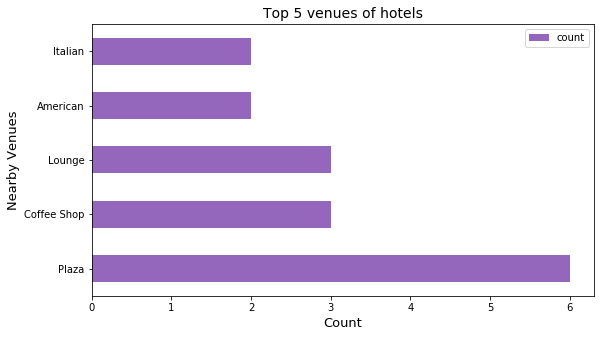

In [356]:
nearby_venues.head(5).plot(kind='barh', figsize=(9,5),color='#9467bd')
plt.ylabel('Nearby Venues', fontsize = 13)
plt.xlabel('Count', fontsize=13)
plt.title('Top 5 venues of hotels', fontsize=14)
plt.show()

## 4. Find 5 possible neighborhood for the new hotel



In [392]:
l=nearby_venues.head(5).index.tolist()

In [384]:
column_names=['Borough', 'Neighborhood']
s=[]
sm=[]
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    cn=[]
    for i in l:
        nb=venues[venues['Category']==i]   
        cn.append(str(len(nb)))
    sm=[Borough,Neighborhood]+cn
    s.append(sm)

In [389]:
df=pd.DataFrame(s,columns=column_names+l)
df.sort_values(by=l,ascending=False,inplace=True)

In [391]:
df.head(5)

,Borough,Neighborhood,Plaza,Coffee Shop,Lounge,American,Italian
112,Manhattan,Lincoln Square,4,5,1,1,4
127,Manhattan,Battery Park City,3,7,0,2,1
114,Manhattan,Midtown,3,4,1,1,2
58,Brooklyn,Windsor Terrace,3,4,0,3,5
59,Brooklyn,Prospect Heights,3,3,0,3,2


<a id="item5"></a>

## 5. Conclusion


- In terms of popularity, traffic flow an transportation, a new afforable hotel should be located in Manhattan. Possible neighborhoods using those set of data are Lincoln Square,Battery Park City	and Midtown. Neighborhood can vary due to different clustering categories. 
- One obstacle of using Foursquare API for hotels is that many data are not available,thus rating and likes information can not be extracted, leading to nearly independing on those feedback data at all. 
- In this report i only used near by venues of similar hotels recommended by Foursquare API,which is feeded by my chosen prototype hotel,Pod 39.
- As the answer to the project question, i would recommand Manhattan Midtown,upper east side and Greenwich Village. A good trade off between pricy place and passenger flow should be further studied.